In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
# Carregar o arquivo csv como um DataFrame
df = pd.read_csv('basic-analitycs.csv')

In [13]:
# Análise exploratória dos dados
print("Informações básicas sobre o DataFrame:")
print(df.info())
print("\nAmostra dos dados:")
print(df.head())


Informações básicas sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None

Amostra dos dados:
  customer_id  trans_date  tran_amount
0      CS5295   11-Feb-13           35
1      CS4768  15-mar.-15           39
2      CS2122   26-Feb-13           52
3      CS1217  16-nov.-11           99
4      CS1850  20-nov.-13           78


In [14]:
# Calcular o número total de transações no conjunto de dados
total_transacoes = df.shape[0]
# Exibir o número total de transações
print("\nNúmero total de transações:", total_transacoes)


Número total de transações: 125000



Média das transações: 64.99


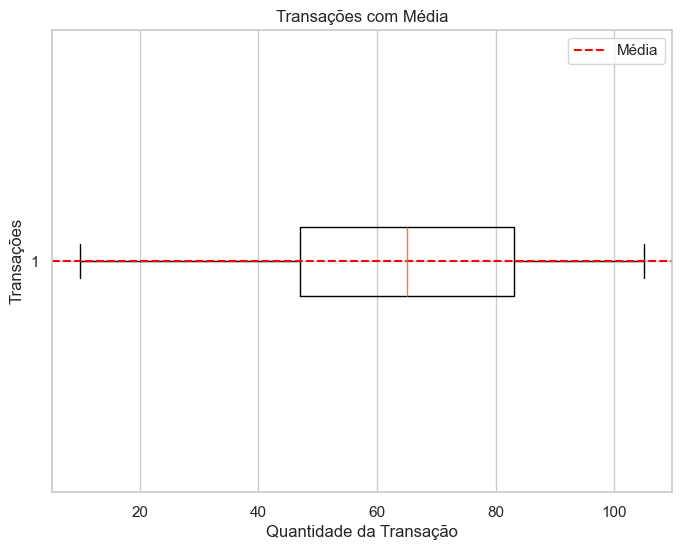

In [65]:
# Calcula a média e o desvio padrão das transações no conjunto de dados
media_transacoes = round(df['tran_amount'].mean(), 2)

# Exibir a média
print("\nMédia das transações:", media_transacoes)

# Cria o gráfico Média
plt.figure(figsize=(8, 6))
plt.boxplot(df['tran_amount'], vert=False)
plt.axhline(y=1, color='red', linestyle='--', label='Média')
plt.xlabel('Quantidade da Transação')
plt.ylabel('Transações')
plt.legend()
plt.title('Transações com Média')
plt.grid(True)
plt.show()

Desvio padrão das transações: 22.86


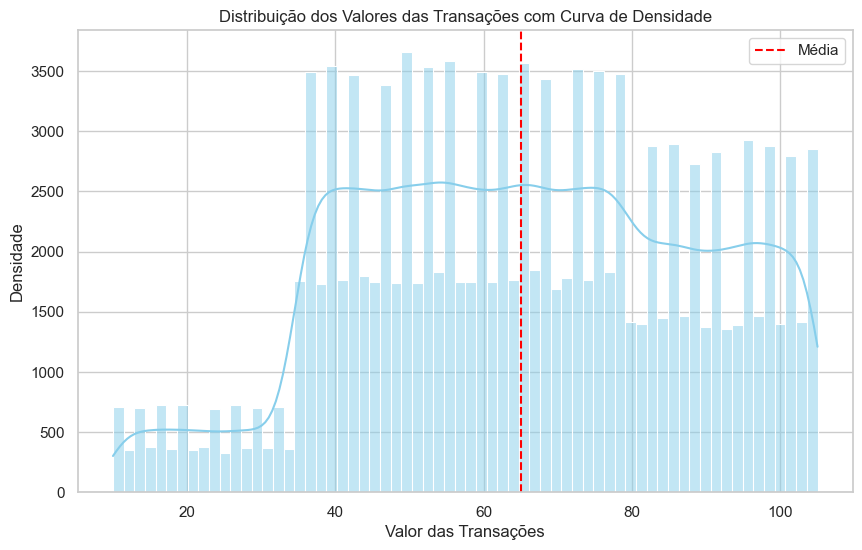

In [64]:
# Calcula o desvio padrão das transações no conjunto de dados
desvio_padrao_transacoes = round(df['tran_amount'].std(), 2)

# Exibir o desvio
print("Desvio padrão das transações:", desvio_padrao_transacoes)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Histograma com curva de densidade
plt.figure(figsize=(10, 6))
sns.histplot(df['tran_amount'], kde=True, color='skyblue')
plt.xlabel('Valor das Transações')
plt.ylabel('Densidade')
plt.title('Distribuição dos Valores das Transações com Curva de Densidade')
plt.axvline(df['tran_amount'].mean(), color='red', linestyle='--', label='Média')
plt.legend()
plt.show()

In [16]:
# Identificar os 10 clientes com a maior quantidade de transações
top_10_clientes = df['customer_id'].value_counts().nlargest(10)
print("\nTop 10 clientes com maior quantidade de transações:")
print(top_10_clientes)

# Calcular as médias transacionais dos top 10 clientes
medias_top_10_clientes = round(df.groupby('customer_id')['tran_amount'].mean().loc[top_10_clientes.index], 2)
print("\nMédias transacionais dos top 10 clientes:")
print(medias_top_10_clientes)


Top 10 clientes com maior quantidade de transações:
customer_id
CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
CS3805    35
CS2620    35
CS3013    35
CS4074    34
CS4998    34
Name: count, dtype: int64

Médias transacionais dos top 10 clientes:
customer_id
CS4424    75.21
CS4320    69.66
CS3799    69.81
CS1215    67.49
CS5109    71.60
CS3805    70.09
CS2620    67.43
CS3013    64.54
CS4074    72.41
CS4998    69.35
Name: tran_amount, dtype: float64


In [17]:
# Cria uma nova coluna no DataFrame com a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['data_recente'] = df.groupby('customer_id')['trans_date'].transform('max')

C:\Users\kabig\AppData\Local\Temp\ipykernel_7112\2065494344.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


Quantidade média de transações por cliente: 18.14


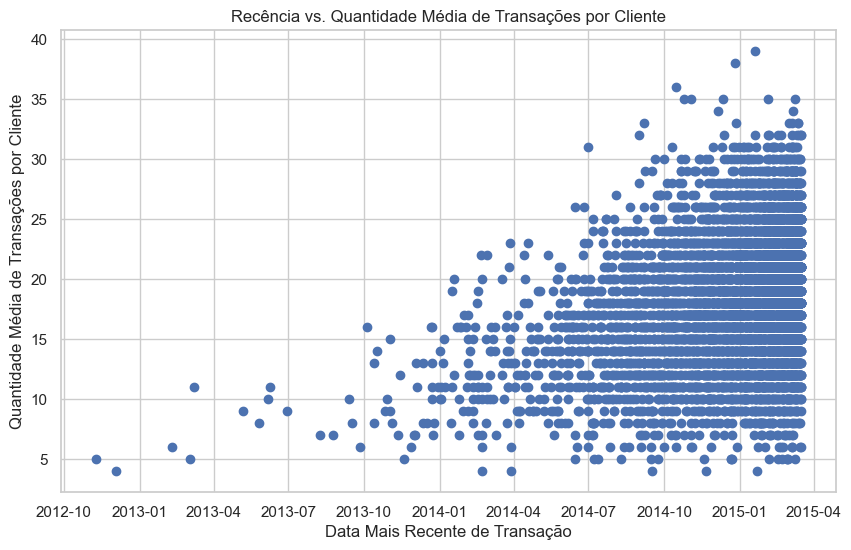

In [23]:
# Calcular a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%b-%y')
recent_date_per_customer = df.groupby('customer_id')['trans_date'].max()

# Calcular a quantidade média de transações por cliente
media_transacoes_por_cliente = round(df.groupby('customer_id').size().mean(), 2)

# Exibir a quantidade média de transações de todos os clientes
print("Quantidade média de transações por cliente:", media_transacoes_por_cliente)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(recent_date_per_customer, df.groupby('customer_id').size())
plt.xlabel('Data Mais Recente de Transação')
plt.ylabel('Quantidade Média de Transações por Cliente')
plt.title('Recência vs. Quantidade Média de Transações por Cliente')
plt.grid(True)
plt.show()

Transação que mais se repete entre todos os meses: 49


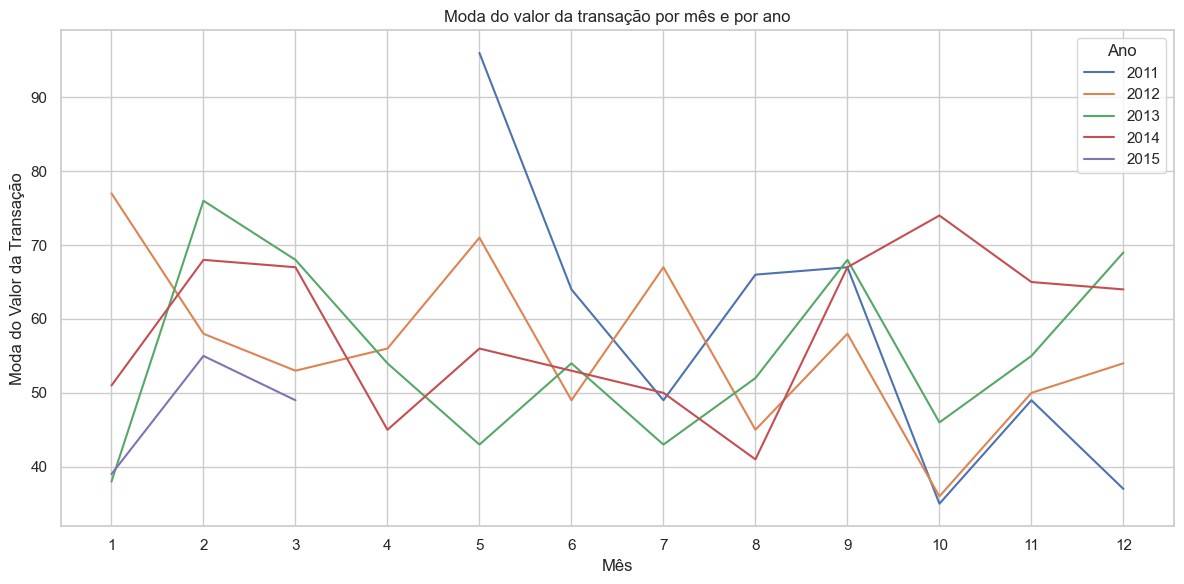

In [67]:
# Extrair o ano e mês de 'trans_date'
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month

# Calcular a moda do valor da transação para todo o conjunto de dados
moda_total = df['tran_amount'].mode()[0]

print("Transação que mais se repete entre todos os meses:", moda_total)

# Calcular a moda do valor da transação para cada ano e mês
moda_por_ano_mes = df.groupby(['year', 'month'])['tran_amount'].apply(lambda x: x.mode().iloc[0])

# Criar um gráfico de linhas para comparar a moda de cada mês por ano
plt.figure(figsize=(12, 6))
for year in moda_por_ano_mes.index.levels[0]:
    moda_por_ano_mes.loc[year].plot(label=year)
plt.title('Moda do valor da transação por mês e por ano')
plt.xlabel('Mês')
plt.ylabel('Moda do Valor da Transação')
plt.legend(title='Ano')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()



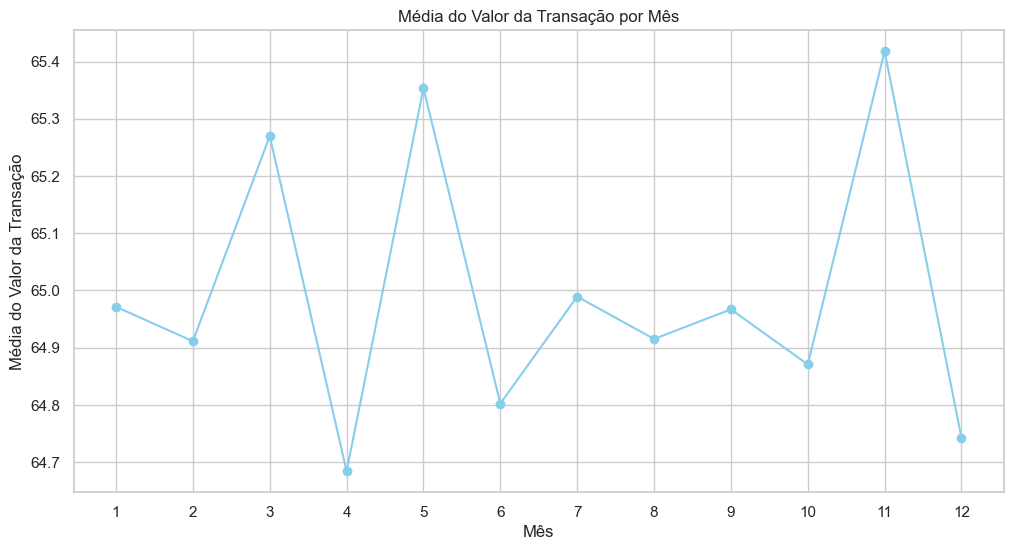

In [68]:
# Calcula a média do valor da transação para cada mês
media_por_mes = df.groupby('month')['tran_amount'].mean()

# Gráfico de linhas com a média de cada mês
plt.figure(figsize=(12, 6))
plt.plot(media_por_mes.index, media_por_mes.values, marker='o', color='skyblue')
plt.title('Média do Valor da Transação por Mês')
plt.xlabel('Mês')
plt.ylabel('Média do Valor da Transação')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [73]:
def mostrar_top_tres_meses(total_por_mes, maior=True):
    # Ordenar os totais de transações por mês
    ordenados = total_por_mes.sort_values(ascending=not maior)
    
    # Selecionar os três primeiros meses
    top_tres_meses = ordenados.head(3)

    if maior:
        descricao = "Os três meses que mais venderam foram:"
    else:
        descricao = "Os três meses que menos venderam foram:"
    
    print(descricao)
    for mes, total_transacoes in top_tres_meses.items():
        print("Mês:", mes, "- Total de transações:", total_transacoes)

# Maiores valores
mostrar_top_tres_meses(total_por_mes, maior=True)
print()

# Menores valores
mostrar_top_tres_meses(total_por_mes, maior=False)

Os três meses que mais venderam foram:
Mês: 8 - Total de transações: 726921
Mês: 10 - Total de transações: 725320
Mês: 1 - Total de transações: 724107

Os três meses que menos venderam foram:
Mês: 4 - Total de transações: 515791
Mês: 5 - Total de transações: 633212
Mês: 3 - Total de transações: 636577


In [76]:
# Calcular a soma total das transações para cada ano
total_por_ano = df.groupby('year')['tran_amount'].sum()

# Identificar o ano com o maior total de transações
ano_mais_vendido = total_por_ano.idxmax()
total_mais_vendido = total_por_ano.max()

# Identificar o ano com o menor total de transações
ano_menos_vendido = total_por_ano.idxmin()
total_menos_vendido = total_por_ano.min()

print("O ano que mais vendeu foi o ano", ano_mais_vendido, "com um total de", total_mais_vendido, "transações.")
print("O ano que menos vendeu foi o ano", ano_menos_vendido, "com um total de", total_menos_vendido, "transações.")

# Filtrar o DataFrame para excluir os dados de 2015 e 2011
df_sem_2015_2011 = df[(df['year'] != 2015) & (df['year'] != 2011)]

# Calcula a soma total das transações para cada ano, considerando apenas os anos diferentes de 2015 e 2011
total_por_ano_sem_2015_2011 = df_sem_2015_2011.groupby('year')['tran_amount'].sum()

# Identifica o ano com o menor total de transações, desconsiderando 2015 e 2011
ano_menos_vendido_sem_2015_2011 = total_por_ano_sem_2015_2011.idxmin()
total_menos_vendido_sem_2015_2011 = total_por_ano_sem_2015_2011.min()

print("O ano que menos vendeu (desconsiderando 2015 e 2011) foi o ano", ano_menos_vendido_sem_2015_2011, "com um total de", total_menos_vendido_sem_2015_2011, "transações.")



O ano que mais vendeu foi o ano 2013 com um total de 2137368 transações.
O ano que menos vendeu foi o ano 2015 com um total de 435175 transações.
O ano que menos vendeu (desconsiderando 2015 e 2011) foi o ano 2014 com um total de 2094508 transações.
